# Computer exercises for section 2: Summarizing and communicating lots of data

In this exercise set we ask you to work with the computer using R. Please work out the problems by writing your
own R code and submit the Jupyter-Notebook at the deatline set for this assignment.

## Exercise 1: Write R code to reconstruct the Nile river flow histogram

In the lecture and the lecture notes we produced a histogram of the Nile river flow data. 

(a) Redo that histogram yourself using R

(b) Change the Main title of the histogram to "Histogram of Nile river flow data at Aswan Egypt" and change the
x axes label to "Annual flow is recorded are 100 millions of cubic meters". Hint: If you don't know how to go about this either use `?hist` - the R help function - to find out. Alternatively you might try a search engine like google of bing and ask something like "changing title and labels in base R histogram".

(c) Redo the histogram in relative frequency scale and using the same main title and x-axis title as in (b). Add the title "Percent" to the y-axis. Hint: Study the (collapsed code chunk in the lecture notes
for the histigram of primary energy consumption per capita for 2019, to see how you could go about this task.)

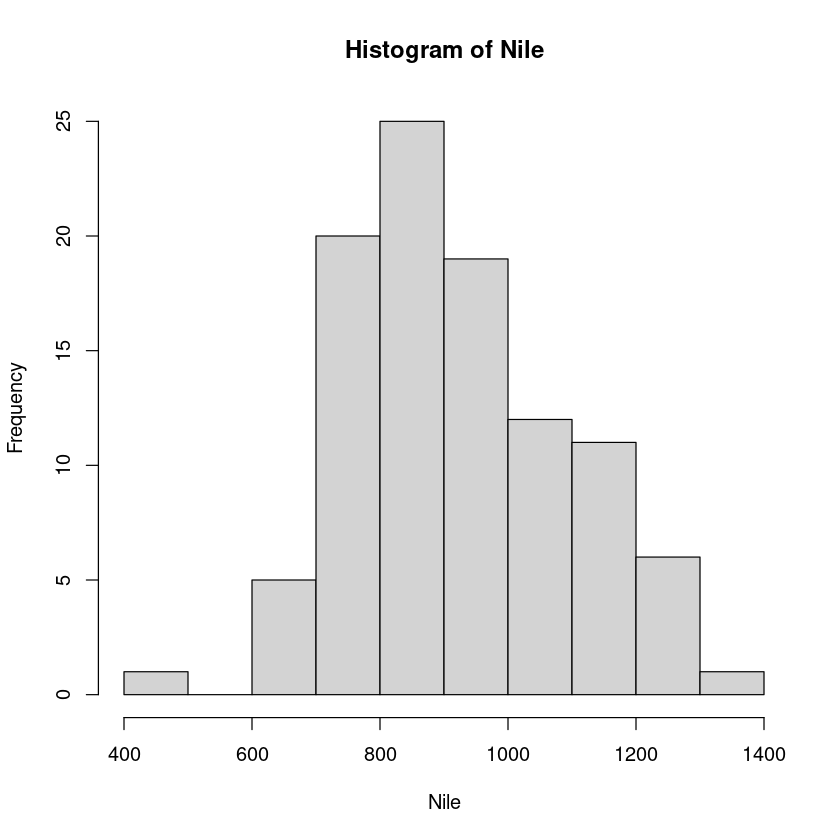

In [1]:
hist(Nile)

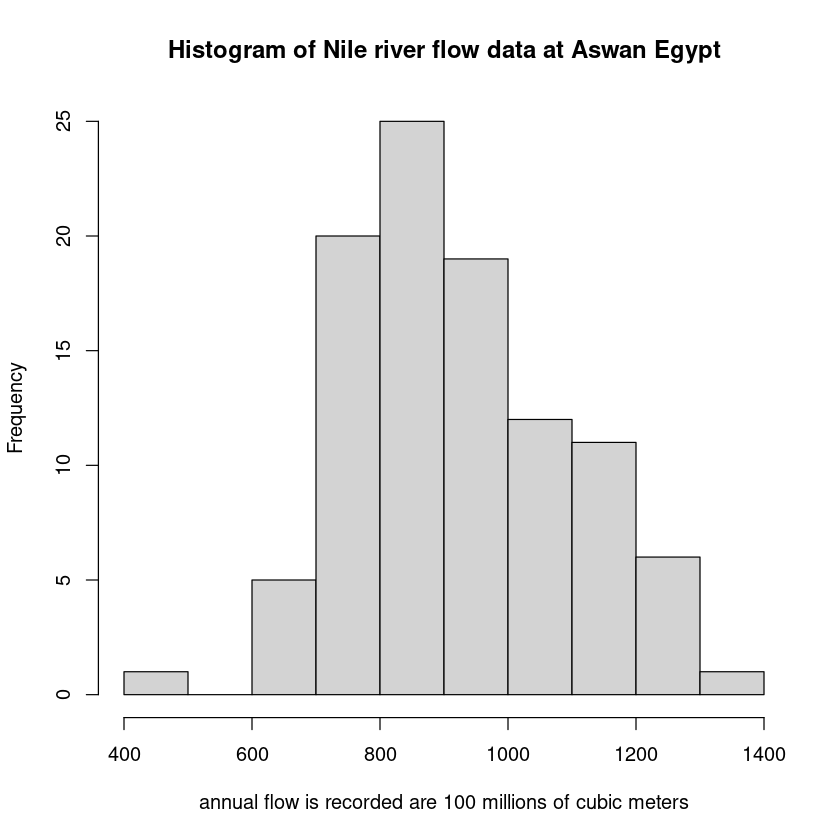

In [2]:
hist(Nile, xlab = "Annual flow is recorded are 100 millions of cubic meters", 
           main = "Histogram of Nile river flow data at Aswan Egypt")

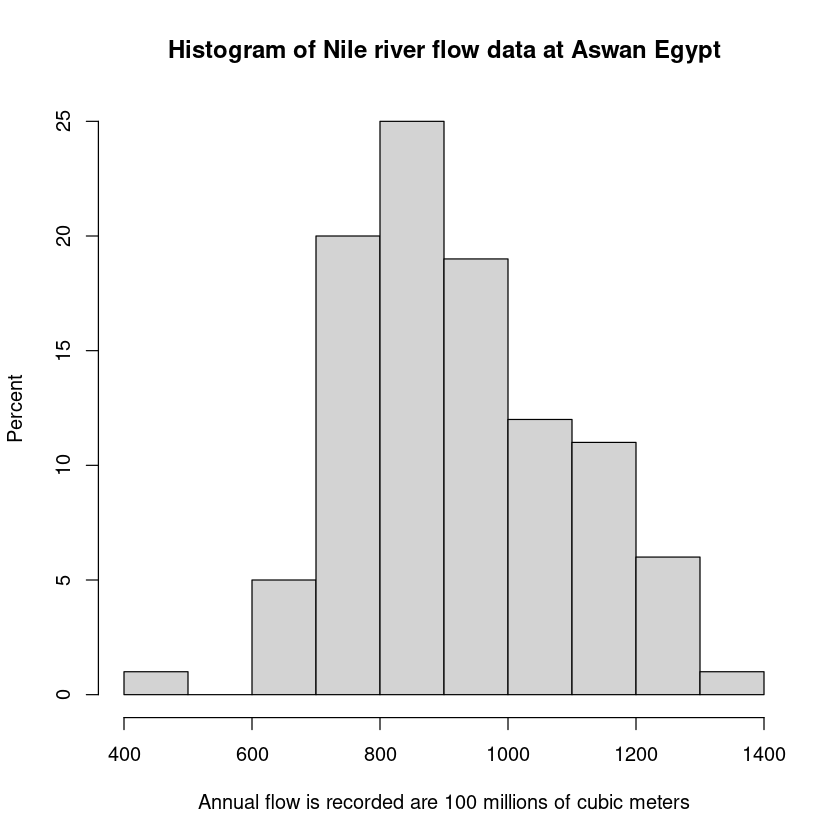

In [4]:
hist_data  <- hist(Nile, plot = FALSE)
hist_data$counts  <- (hist_data$counts/sum(hist_data$counts))*100
plot(hist_data, freq = T, xlab = "Annual flow is recorded are 100 millions of cubic meters", 
     ylab = "Percent", main = "Histogram of Nile river flow data at Aswan Egypt")

## Exercise 2: Download data from the internet and load them into R

Go to the website of **Our world in Data** (https://ourworldindata.org/) and find the data on energy use per person. Download this file locally to your machine. From this location load the file into R and store it in an
object called "energy_consumption_per_person". Note that the path you use when reading your data will need to specify the location of the file on your own machine. Display the first 10 rows of the file.

When I investigated the file, I noticed that there were empty cells for some variable values in the csv file. Use this information and the help function of read.csv to set the na.strings argument such that empty characters "" are replaced by NA

In [28]:
energy_consumption_per_person  <- read.csv(
    "~/R/Statistics_JWL/data/energy_use_per_capita/per-capita-energy-use.csv",
na.strings = c(""))

In [29]:
head(energy_consumption_per_person, n = 10)

,Entity,Code,Year,Primary.energy.consumption.per.capita..kWh.person.
,<chr>,<chr>,<int>,<dbl>
1,Afghanistan,AFG,1980,583.2944
2,Afghanistan,AFG,1981,666.3782
3,Afghanistan,AFG,1982,725.6599
4,Afghanistan,AFG,1983,912.1396
5,Afghanistan,AFG,1984,941.3926
6,Afghanistan,AFG,1985,939.6124
7,Afghanistan,AFG,1986,976.6691
8,Afghanistan,AFG,1987,1592.7023
9,Afghanistan,AFG,1988,2805.6096


 ## Exercise 3: Change variable names of your data object
 
 Use the `names()` function of R to change the variable names in the dataframe `energy_consumption_per_person` to
 "Country" instead of "Entity", "ISO" instead of "Code, keep Year as it is and change "Primary.energy.consumption.per.capita..kWh.person" to "Consumption".

In [30]:
names(energy_consumption_per_person)  <- c("Country", "ISO", "Year", "Consumption")

## Exercise 3: Check the data before working further with them

Let us first check how many rows and columns our dataframe has. Use the `dim()`function which reads this
information from the attributes of your dataframe object.

In [31]:
dim(energy_consumption_per_person)

[1] 10215     4

## Exercise 4: Select the data for the year 2020 and check their dimensionality

1. Now use R to select the data for the year 2020 from the dataframe and write this selection into a new object called "energy_consumption_per_person_2020". Then check the dimensionality of these data. 

2. Find the entries in the
   dataframe which have NA for the ISO variable. To find the NA values use the R function `is.na()`. Explain what
   `is.na()` does and how you can use the result for selecting particular values of variables.

3. Why do these entries have an NA? Remove these entries and plot a histogram of the cleaned data. Hint: One way to go about this is to use logical negation, which is `!`in R. For example: `!is.na(x)` would give you all components of x which are not NA.

In [32]:
energy_consumption_per_person_2020  <- energy_consumption_per_person[energy_consumption_per_person$Year == 2020, ]
dim(energy_consumption_per_person_2020)

[1] 90  4

In [33]:
energy_consumption_per_person_2020[is.na(energy_consumption_per_person_2020$ISO), ]

,Country,ISO,Year,Consumption
,<chr>,<chr>,<int>,<dbl>
96,Africa,NA,2020,3913.185
489,Asia,NA,2020,18001.008
2925,Europe,NA,2020,37985.273
2982,European Union (27),NA,2020,35601.789
3975,High-income countries,NA,2020,53872.859
5295,Lower-middle-income countries,NA,2020,6322.842
6626,North America,NA,2020,52011.910
6852,Oceania,NA,2020,42945.570
8419,South America,NA,2020,15031.484


In [34]:
ecpp_2020_countries  <- energy_consumption_per_person_2020[!is.na(energy_consumption_per_person_2020$ISO), ]

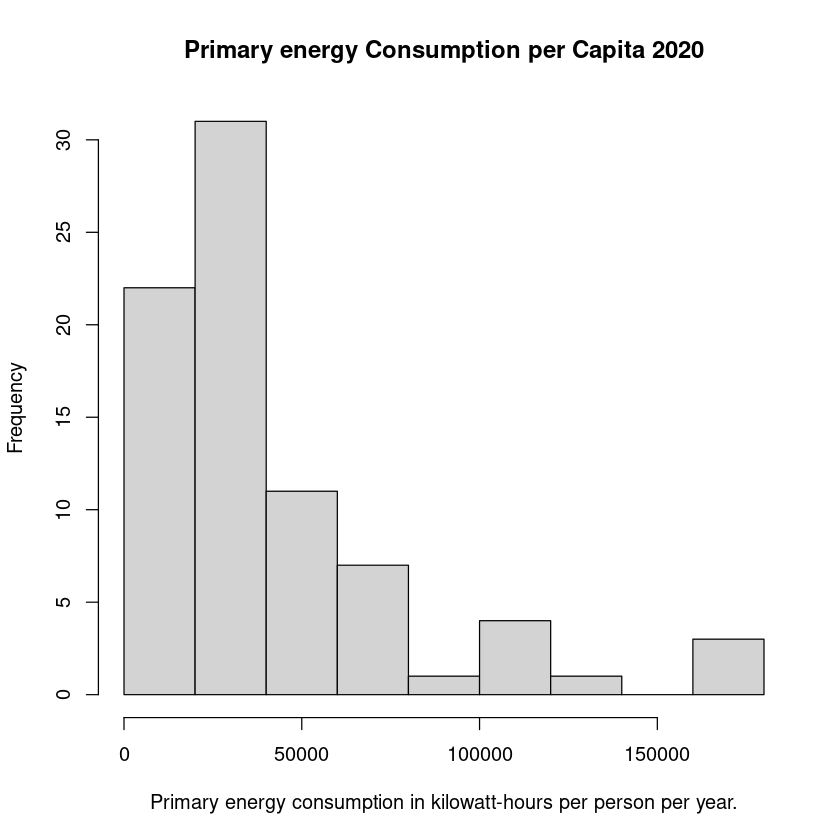

In [35]:
hist(ecpp_2020_countries$Consumption, xlab = "Primary energy consumption in kilowatt-hours per person per year.", main = "Primary energy Consumption per Capita 2020")

## Exercise 4: Open ended question

In this exercise I gave you the information that the dataframe contained country level data as well as data at the
regional level. If I had not given you this information, how could you have learned this fact yourself using R? Discuss.

## Exercise 5: Energy consumption over time

In exercise 2 we have downloaded the data from the internet and then loaded them into R. In preparing this course I have also collected and documented all the datasets we use in this course in an R library, which is called JWL. Load this library with the command `library(JWL)`. The dataset for energy consumption is called `energy_consumption_per_capita`. Before you proceed study the dataset using the R help function by typing
`?energy_consumption_per_capita`.

a) Select the data for China and plot energy consumption per capita over time using subsetting by name. Be careful to check how the variables are called in the dataset loaded through the JWL library, for instance by using the 
`names()`function or by displaying a few lines of the dataframe using the `head()` function.

b) Select the data for India. Make a line plot as for China.

c) For each data-set make a plot showing both lineplots within
   one frame. You add a second line to a plot in base R by using the function `lines()` with the same arguments as
   `plot()` and typing the command just after the plot command. 

e) How do you interpret these plots?

f) Do an analysis of the data of your own country. How does it compare to the stories of China and India. Can you tell a story explaining the pattern you are observing?

Hint: You can use R's `plot()` function with the following syntax:

plot(x, y, type = "l", lty = 1) where 

1. x, y: coordinate vectors of points to join

2. type: character indicating the type of plotting. Allowed values are:
   a) “p” for points
   b) “l” for lines
   c) “b” for both points and lines
   d) “c” for empty points joined by lines
   e) “o” for overplotted points and lines
   f) “s” and “S” for stair steps
   g) “n” does not produce any points or lines

3. lty: line types. Line types can either be specified as an integer (0=blank, 1=solid (default), 2=dashed, 3=dotted, 4=dotdash, 5=longdash, 6=twodash) or as one of the character strings “blank”, “solid”, “dashed”, “dotted”, “dotdash”, “longdash”, or “twodash”, where “blank” uses ‘invisible lines’ (i.e., does not draw them).

4. If you want to color a line you can add the argument col = "red" or col = "blue" etc.

In [13]:
library(JWL)
china_over_time  <- energy_consumption_per_capita[energy_consumption_per_capita$Country == "China", ]
india_over_time  <- energy_consumption_per_capita[energy_consumption_per_capita$Country == "India", ]

In [14]:
plot_data_chn  <- china_over_time[c("Year", "Cons")]
plot_data_ind  <- india_over_time[c("Year", "Cons")]

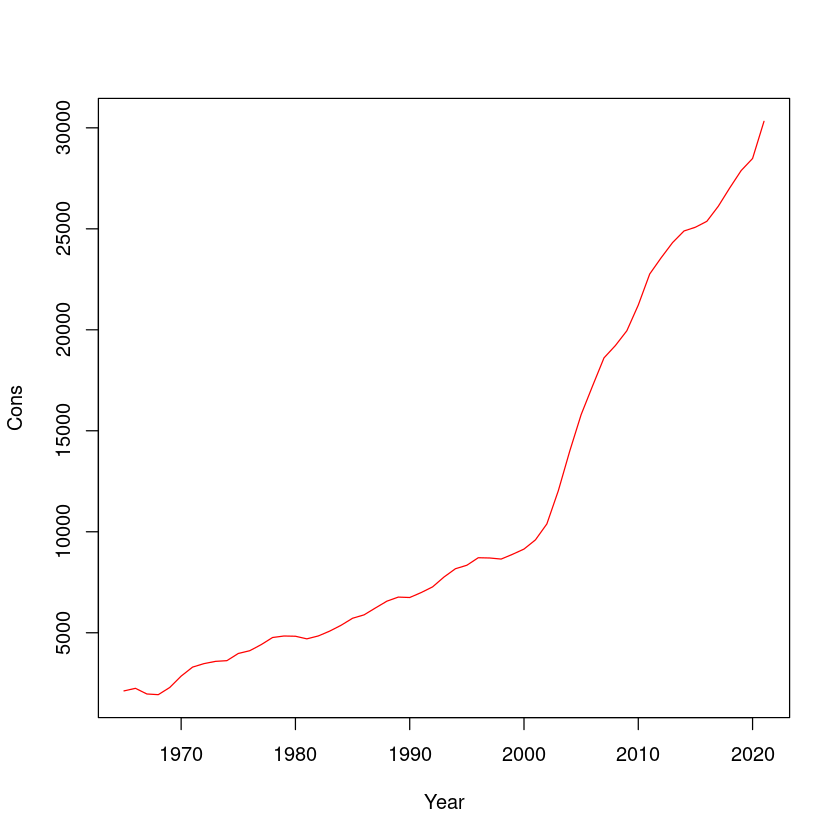

In [15]:
plot(plot_data_chn, type = "l", lty = 1, col = "red")

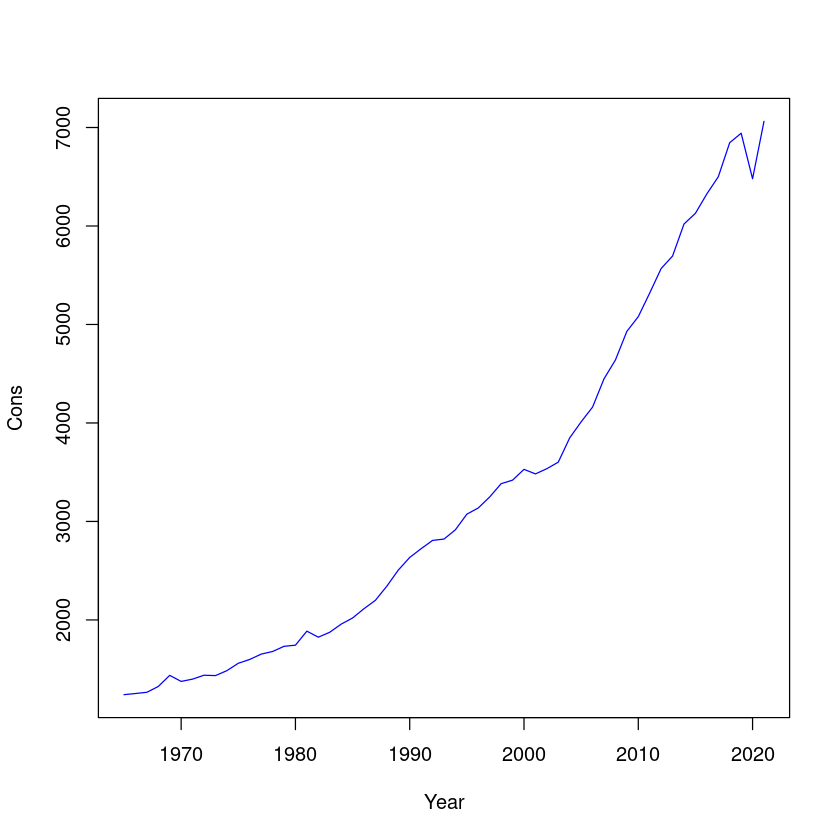

In [16]:
plot(plot_data_ind, type = "l", lty = 1, col = "blue")

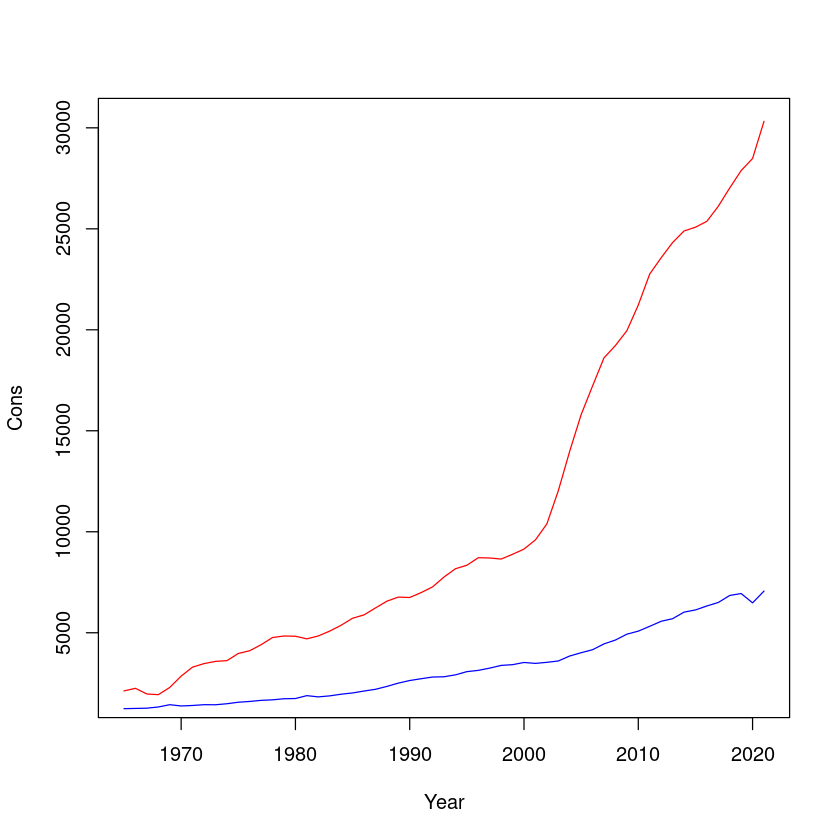

In [17]:
plot(plot_data_chn, type = "l", lty = 1, col = "red")
lines(plot_data_ind, type = "l", lty = 1, col = "blue")

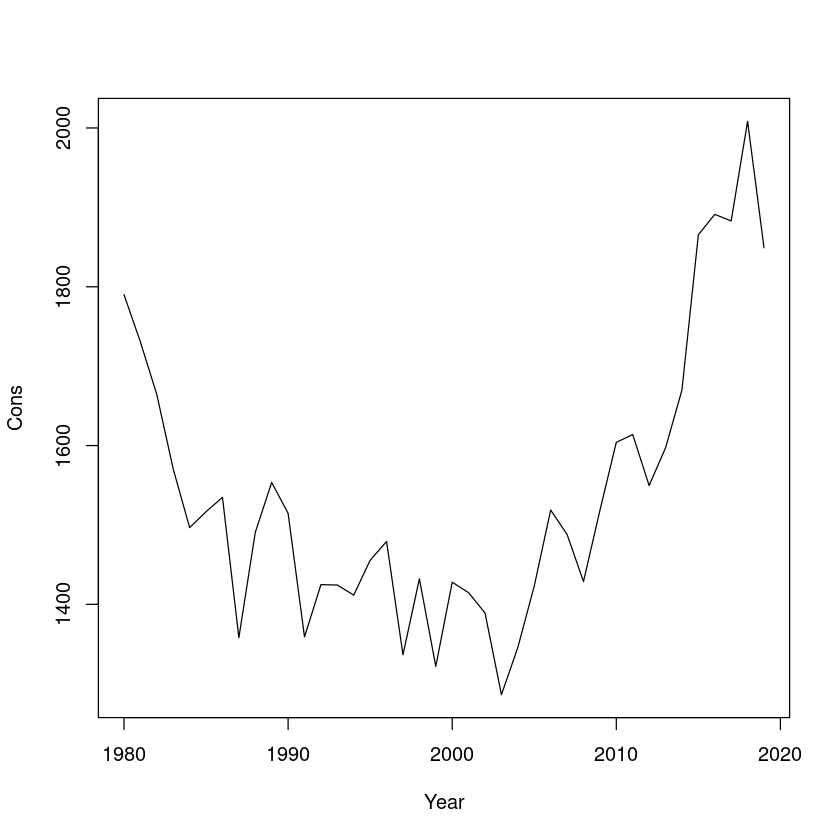

In [25]:
kenya_over_time  <- energy_consumption_per_capita[energy_consumption_per_capita$Country == "Kenya", ]
plot_data_ken  <- kenya_over_time[c("Year", "Cons")]
plot(plot_data_ken, type = "l", lty = 1, col = "black")

## Exercise 6: Compute and plot the rate of change of energy consumption for China and for your own country.

Use R to compute the annual increase in energy consumption per capita in percent and plot this annual rate of change for China. Do the same exercise for your own country.

To understand better what is needed in this exercise, let us denote energy consumption in year $t$ by $c_t$. Then the percentage change in annual energy consumption is given by $\text{perc_change} = (c_{t+1} - c_t)/c_t$. This means that when you compute the changes your data get "shorter" by one observation. This is because, when you start at the first observation, you have to subtract the second from the first value and divide by the first value, then you have to subtract the third from the secon value and divide by the second value and so on for all values of the primary energy consumption variable.

Hint: You can create a new variable of annual percentage change by direct calculation or by using the base R function `diff()`, which you might look up using the help function. `diff()` does the differecning for you. When you want to append the differenced values ($c_{t+1} - c_t$) to the original dataframe, you miss one row, which you have lost through the differencing. To achieve the same row number, you have to append an NA at the beginning. For the denominator, note that in R, when you type `x[-1]` - for example - R will drop the first value, if you type `x[-2]`it will drop the second value etc. This fact can be used to compute the denominator for the computation of percentage change.

In [20]:
china_over_time$per_change  <- c(NA, diff(china_over_time$Cons)/
                                 china_over_time$Cons[-length(china_over_time$Cons)])

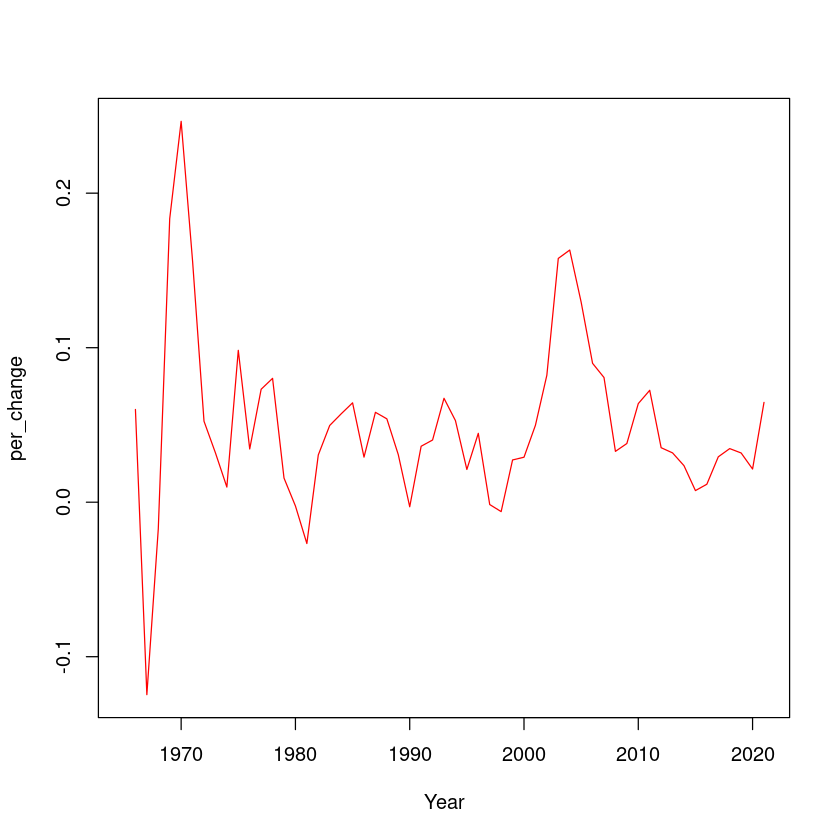

In [21]:
dat  <- china_over_time[c("Year", "per_change")]

plot(dat, type = "l", lty = 1, col = "red")

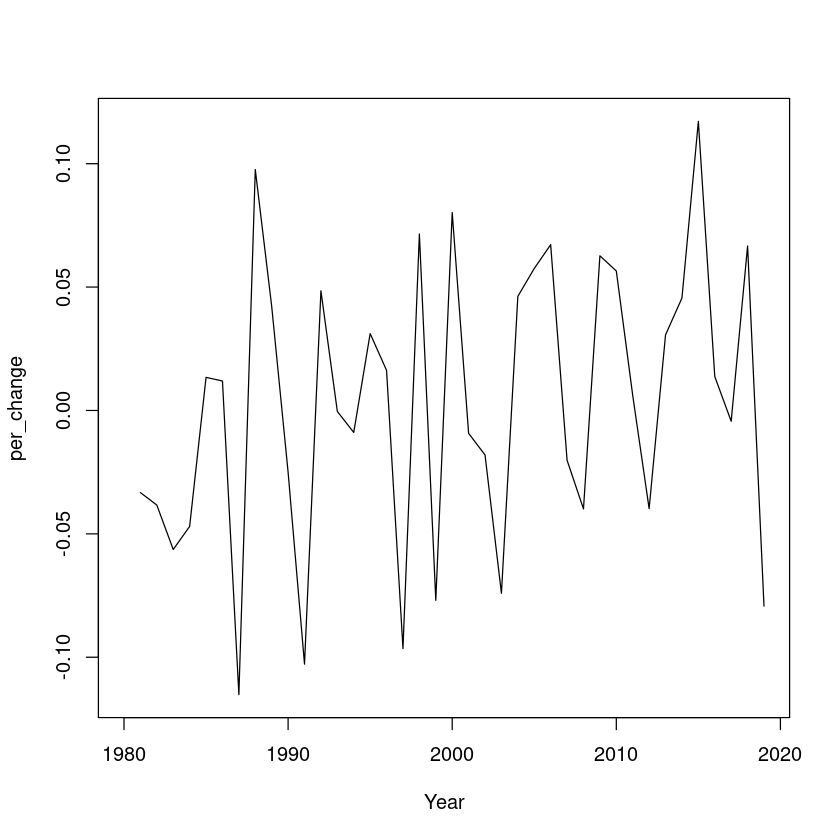

In [23]:
kenya_over_time  <- energy_consumption_per_capita[energy_consumption_per_capita$Country == "Kenya", ]
kenya_over_time$per_change  <- c(NA, diff(kenya_over_time$Cons)/
                                 kenya_over_time$Cons[-length(kenya_over_time$Cons)])

datk  <- kenya_over_time[c("Year", "per_change")]

plot(datk, type = "l", lty = 1, col = "black")

## Exercise 7: Select values from a dataframe that fulfill a condition.

Take the variable you have computed above, `ecpp_2020_countries` the annual energy consumption per capita accross
countries in the world. Compute the share of countries that have an energy consumption below the global average of the year 2020.

In [36]:
m <- mean(ecpp_2020_countries$Consumption)

In [37]:
mean(ecpp_2020_countries$Consumption < m)

[1] 0.675

## Exercise 8: Monitoring the nutritional state of children using anthropometric survey data

In this exercise we practice the computational analysis of a large survey dataset, to solidify our knowledge of R as well as statistics learned so far in this course. 

The data are from a model dataset of the DHS (DHS is an abbreviation for Demographic and Health Survey) program, a US based program on demographics and health in various parts of the developing world. The data are used to monitor demographic and health developments to decide where policy action might be needed. 

The data we are using are not from an actual survey but they are from a syntetic model dataset provided by the DHS for teaching and training. Let us call the country our data refer to "exercise_country". These data will serve as the basis for this
exercise. The DHS website can be found here: https://dhsprogram.com/ and the model data sets can be found
here https://dhsprogram.com/data/model-datasets.cfm

Before we go into the details of the data we need a bit of context to understand what the data for this exercise are precisely describing. In the analysis we are going to produce a statistical table on the nutritional status of children
under five years.

Antropometry provides data on the human body and reveals information about a persons nutritional status. The nutritional status of children is observed to monitor and measure malnutrition in a population. The nutritional data of children are included in the United Nations development goals indicators.

The DHS survey collects data on children's sex, age, height-length, and weight to monitor the nutritional status of children in a population. The nutritional indicators are sex and age specific because boys and girls grow at
different rates. Their growth rates are also age dependent.

Four indicators on nutritional status are collected in DHS surveys:

(a) **Overweight**: This indicates high weight for height and is a measure of excess weight. This results from an
imbalance of energy consumed (too much) and energy expended (too little). Children with this condition have an
increased risk of non-communicable diseaeses, such as hight blood pressure and diabetes and is assicated with increased risk of being obese and overweight in adulthood.

(b) **Stunting**: This is low height-for-age. It is a measure of growth faltering and may result from a deficient growth environment, recurrent infections, chronic deseases and other causes. It is associated with impaired brain
development and reduced academic achievement in childhood and lower economic potential as an adult.

(c) **Wasting**: Is low weight-for-height and is a measure of acute weight loss. This may result from inadequate food intake or from illness or infection. With this condition children are more susceptible for disease and
have a higher risk of death.

(d) **Underweight**: Is low weight-for-age and is a measure of weight relative to a child's age. It refects children who are stunted or wasted or both.

The World Health Organisation (WHO) child growth standards provide a single international standard that describes
the physiological growth for all children from birth to age 5. The measurements of individual children are compared to the WHO Child Growth Standards to assess each child's growth. The WHO Growth Standards for children use a distribution that is expressed in units of standard deviations from the mean, also called z-scores. 
It is a distribution with a
mean 0 and standard deviation 1. Within 1 standard deviation are about 67 % of all values, within 2 95 % and within 3 standard deviations 99.7%. Height for age, weight for height, and weight for age of children are expressed in these units. 

Statistical cutoffs are used to measure malnutriton. If a child's height for age is below minus two standard deviations from the mean (expressed in z-scores), the child is considered stunted. If it is below minus three
standard deviations from the mean it is considered severely stunted. If the weight-for-height z-score is below
minus 2 standard deviations from the mean the child is considered wasted, if it is below three standard deviations
from the mean it is considered severly wasted. if the weight for height z-score is above two standard deviations from the mean the child is considered overweight, if three standard devaitions above it is considered obese. If the weight for height z-score of a child is below two standard deviations from the mean it is considered underweight, if three, severely underweight.

The WHO uses the following prevalence thresholds to assess the problems of stunting and wasting in a population of children:

| Classification |                |                      |
|:---------------|:---------------|:---------------------|
|                | stunting       |wasting and overweight|
|                |                |                      |
| very high      | 30% or more    | 15 % or more         |
| high           | 20 - 29 %      | 10 - 14 %            |
| medium         | 10 - 19 %      |  5 - 9 %             |
| low            |  2.5 - 9 %     | 2.5 - 4 %            |
| very low       | Less than 2.5 %| Less than 2.5 %      |


Prevalence is the proportion of a population who have a specific characteristic in a given time period. In a survey prevalence is measured by the number of people in a sample who have the characteristic divided by all people in the sample.

With this background and context in this exercise you are asked to analyze the nutritional status of children
in exercise-country to support and advise a multisectoral nutrition plan.

(a) Load the JWL data package using `library(JWL)` and store the data `children_nutrition_data` in an R object for further analysis. Use the help function `?children_nutrition_data` to learn about the dataset and the variable names of the data. Use the `head()`function to look at the first 10 rows of the data. Determine the data type of each of the variables and go back to the lecture notes to study again the meaning of these data types.

(b) Use the `dim()` function to determine how many rows and columns your dataframe has. In the data each row corresponds to one individual, i.e. one child, and each column corresponds to one variable. It is typical in
surveys that individual obseravtions are weighted. We will learn the reason for this in the next lecture. For now it is enough that you know that when counting individual observations we not just count the rows but we add up the weights. As you have seen in (a) the weight variable is called `wt`in our data. When suming up the individual weights you learn the total number of children in the survey. Use R to determine thus number and report it.

(c) Use R to compute the prevalence of children who are wasted and stunted. Hint: Remember what you have learned about vectors of type logical and the R coercion rules. To take into account the survey weights, you need to multiply the weight value with the value of the variable. For examle if you write `TRUE * 1/2` in R by the R coercsion rules, R will transform `TRUE` into a 1 and give back 1/2 as a result. Multiplying the variable with the weights component by component and suming up will give you the total numbers which you need to compute the rate.

(d) Use the WHO prevalence thresholds to judge the situation. Give a statement based on the data on the classification of the prevalence of stunting and wasting in exercise country.

(e) Which two regions have the highest prevalence of stunting and wasting?

(f) Compute the mean of the z-score in the height for weight variable for children between 18 and 23 months. Compute the standard deviation. Plot a histogram of these subset of the data.

(g) How would you describe the relation between wealth and stunting and wasting in exercise-country?


In [1]:
library(JWL)

In [2]:
data  <- children_nutrition_data

In [3]:
?children_nutrition_data

In [5]:
head(data)

,wt,age_in_months,sex,type_of_residence,region,wealth_index,nt_ch_sev_stunt,nt_ch_stunt,nt_ch_haz,nt_ch_sev_wast,nt_ch_wast,nt_ch_ovwt_ht,nt_ch_whz,nt_ch_sev_underwt,nt_ch_underwt,nt_ch_ovwt_age,nt_ch_waz
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>
16,1.049502,24 - 35,female,rural,region 2,middle,FALSE,FALSE,-0.73,FALSE,FALSE,FALSE,0.29,TRUE,FALSE,FALSE,-0.13
27,1.049502,24 - 35,female,rural,region 2,poorer,FALSE,TRUE,-2.23,FALSE,FALSE,FALSE,-0.42,TRUE,FALSE,FALSE,-1.59
36,1.049502,36 - 48,female,rural,region 2,poorest,FALSE,TRUE,-2.10,FALSE,FALSE,FALSE,0.37,TRUE,FALSE,FALSE,-1.01
94,1.049502,9 - 11,male,rural,region 2,poorer,FALSE,FALSE,-0.64,FALSE,FALSE,FALSE,-0.77,TRUE,FALSE,FALSE,-0.92
106,1.049502,36 - 48,female,rural,region 2,middle,FALSE,FALSE,-0.38,FALSE,FALSE,FALSE,-0.54,TRUE,FALSE,FALSE,-0.56
113,1.049502,24 - 35,male,rural,region 2,poorer,FALSE,TRUE,-2.08,FALSE,FALSE,FALSE,-1.02,TRUE,FALSE,FALSE,-1.84


In [6]:
dim(data)

[1] 2559   17

In [7]:
sum(data$wt)

[1] 2494.102

In [13]:
round(sum(data$nt_ch_stunt*data$wt)/sum(data$wt),3)

[1] 0.359

The proportion of children who are stunted is 35.9%

In [15]:
round(sum(data$nt_ch_wast*data$wt)/sum(data$wt),3)

[1] 0.1

The proportion of children who are wasted is 10 %

The prevalence in stunting is very high and the prevalence in wasting is high.

In [20]:
aux1  <- data[data$region == "region 1", ]
aux2  <- data[data$region == "region 2", ]
aux3  <- data[data$region == "region 3", ]
aux4  <- data[data$region == "region 4", ]

In [22]:
round(sum(aux1$nt_ch_stunt*aux1$wt)/sum(aux1$wt),3)
round(sum(aux2$nt_ch_stunt*aux2$wt)/sum(aux2$wt),3)
round(sum(aux3$nt_ch_stunt*aux3$wt)/sum(aux3$wt),3)
round(sum(aux4$nt_ch_stunt*aux4$wt)/sum(aux4$wt),3)

[1] 0.337

[1] 0.408

[1] 0.3

[1] 0.393

Region 2 has the highest prevalence in stunting.

In [23]:
round(sum(aux1$nt_ch_wast*aux1$wt)/sum(aux1$wt),3)
round(sum(aux2$nt_ch_wast*aux2$wt)/sum(aux2$wt),3)
round(sum(aux3$nt_ch_wast*aux3$wt)/sum(aux3$wt),3)
round(sum(aux4$nt_ch_wast*aux4$wt)/sum(aux4$wt),3)

[1] 0.114

[1] 0.096

[1] 0.099

[1] 0.078

Region 1 has the highest prevalence in wasting.

In [26]:
subdat  <- data[data$age_in_months == "18 - 23", ]

mean(subdat$nt_ch_haz)
sd(subdat$nt_ch_haz)

[1] -1.495882

[1] 2.071905

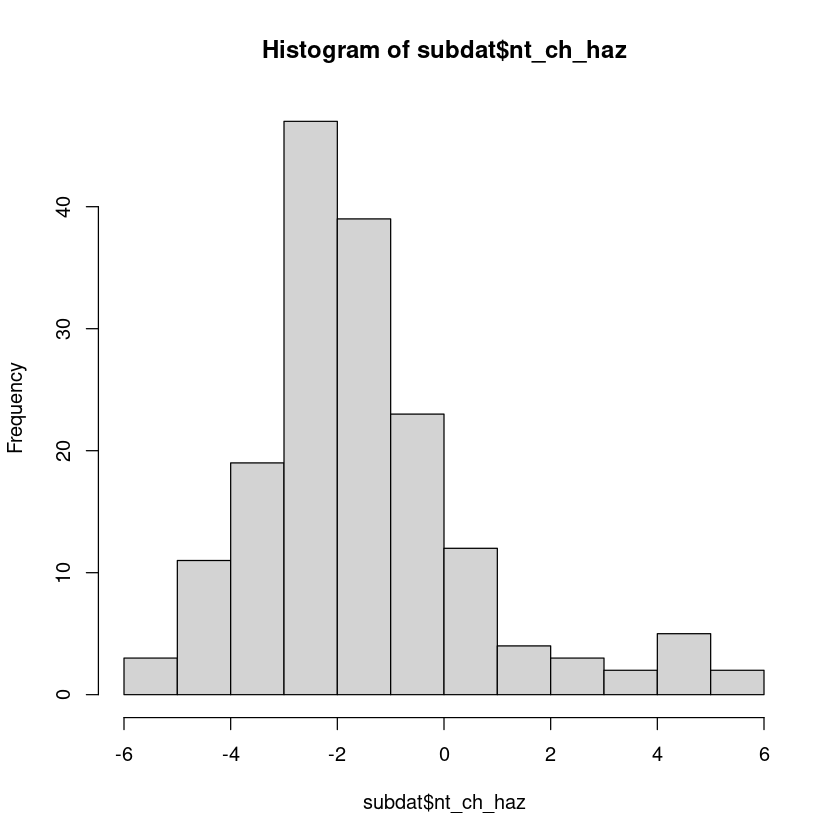

In [27]:
hist(subdat$nt_ch_haz)

In [33]:
rel1  <- data[data$wealth_index == "poorest", ]
rel2  <- data[data$wealth_index == "poorer", ]
rel3  <- data[data$wealth_index == "middle", ]
rel4  <- data[data$wealth_index == "richer", ]
rel5  <- data[data$wealth_index == "richest", ]

In [35]:
round(sum(rel1$nt_ch_stunt*rel1$wt)/sum(rel1$wt),3)
round(sum(rel2$nt_ch_stunt*rel2$wt)/sum(rel2$wt),3)
round(sum(rel3$nt_ch_stunt*rel3$wt)/sum(rel3$wt),3)
round(sum(rel4$nt_ch_stunt*rel4$wt)/sum(rel4$wt),3)
round(sum(rel5$nt_ch_stunt*rel5$wt)/sum(rel5$wt),3)

[1] 0.408

[1] 0.378

[1] 0.369

[1] 0.316

[1] 0.275

In [36]:
round(sum(rel1$nt_ch_wast*rel1$wt)/sum(rel1$wt),3)
round(sum(rel2$nt_ch_wast*rel2$wt)/sum(rel2$wt),3)
round(sum(rel3$nt_ch_wast*rel3$wt)/sum(rel3$wt),3)
round(sum(rel4$nt_ch_wast*rel4$wt)/sum(rel4$wt),3)
round(sum(rel5$nt_ch_wast*rel5$wt)/sum(rel5$wt),3)

[1] 0.084

[1] 0.11

[1] 0.125

[1] 0.083

[1] 0.093